In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras import models
from keras.applications.densenet import preprocess_input
from keras.utils import img_to_array, load_img

In [2]:
POKEMON_NAMES = ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'Mr. Mime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidoran♀', 'Nidoran♂', 'Nidorina', 'Nidorino', 'Ninetales', 'Oddish', 'Omanyte', 'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pikachu', 'Pinsir', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Primeape', 'Psyduck', 'Raichu', 'Rapidash', 'Raticate', 'Rattata', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scyther', 'Seadra', 'Seaking', 'Seel', 'Shellder', 'Slowbro', 'Slowpoke', 'Snorlax', 'Spearow', 'Squirtle', 'Starmie', 'Staryu', 'Tangela', 'Tauros', 'Tentacool', 'Tentacruel', 'Vaporeon', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Zapdos', 'Zubat']

In [3]:
model = models.load_model('models/model_final.tf')

Top 5 Matches
1. Chansey     26.15%
2. Jigglypuff  20.10%
3. Poliwag     11.13%
4. Raticate    10.78%
5. Clefairy    10.36%


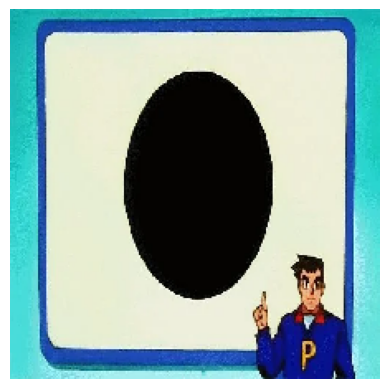

In [4]:
# Change to path of your image file
IMAGE_PATH = 'path/to/image.png'

img = load_img(IMAGE_PATH, target_size=(224, 224))
img_arr = preprocess_input(img_to_array(img))
preds = model.predict(img_arr[None, :], verbose=0).flatten()
top_idx = np.argsort(-preds)

K = 5  # Change to get different numbers of results

width = max(len(POKEMON_NAMES[idx]) for idx in top_idx[:K])
print(f'Top {K} Matches')
for i, idx in enumerate(top_idx[:K]):
    print(f'{i + 1:{len(str(K))}}. {POKEMON_NAMES[idx]:{width}} {preds[idx]:7.2%}')

plt.axis('off')
plt.imshow(img)
plt.show()